Processing a.png...


Using CPU. Note: This module is much faster with a GPU.


Detected rotation angle for D:/IMage\a.png: 0


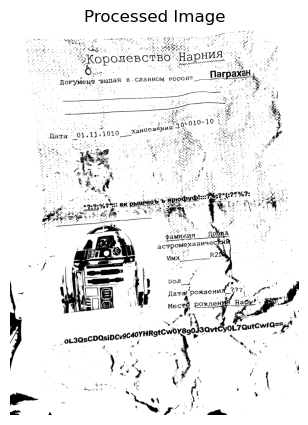

Text from D:/IMage\a.png:
Королевство" Нарния Паграхан Документ : #ыан В сланном гоооно Дата: o1.1i 1010 (:?"%2: Ярюфуф:: % вK амилйя Доб7А астромехаяичесой R2X Имх Uол_ Щата  рожиения ??? Место рожленк Hagy aLзascbasiDCyBCAvHRgtCwovre9uiзavсyu_ таннсwа 7 ;i::+ #:.< ; '10l0-10 Ханцеяанин рышчi@#: ix x

Processing a1.jpg...


Using CPU. Note: This module is much faster with a GPU.


Detected rotation angle for D:/IMage\a1.jpg: 0


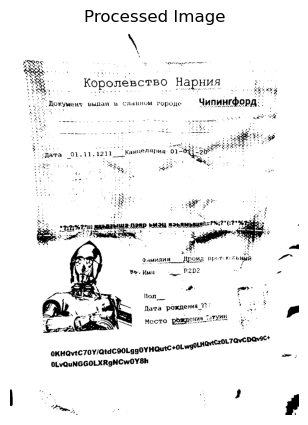

Text from D:/IMage\a1.jpg:
Королевство Нарния Документ выан cJauном  тороде Чипингфорд Дата 01. 11 1211 Канцелярия- {?gP WМЭМ яэо ЧыЯW 7 Фямилия Дрои; Пl]+ Г! кхт Ь ныГ Имя R2DZ Шол Да га ротдения _?? Мссто #туищ акноистоvюнасашLаgотнаикс-оLмонос-ламсоажж  OLvQuNGGOLXRgNGWOYBh ротдсния ;нас?

Processing r1.jpg...


Using CPU. Note: This module is much faster with a GPU.


Detected rotation angle for D:/IMage\r1.jpg: 270
Rotating image by 270 degrees.


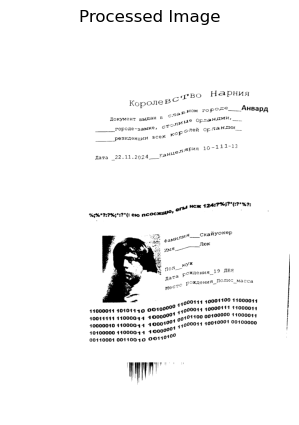

Text from D:/IMage\r1.jpg:
Нарния ном Анвард Документ выдах Б Ортандии, городе-замке; хуи резиденцуи 5cex 1G - 1 1 1-13 Дата 22 . 11.202 4 нсх 12A52 %;2*(*2*%62: %;%"2:? Х;":?*(: ею Скайуокер Люк ния 1 9 ДБЯ роддения Полис масса 10001100 11ОО0011 11000011 11000011 10101110 11000011 10011111 11000011 оо100000 10000010 1100001 1 10100000 11000011 00110001 00110010 Королевство ropoде стa= стэлуце Op zа косслей Канцеласия огы псосжшюю, Фамилия Имя хух псл сождет Дата Meсzо 11000111 оо100000 10000111 11000011 10ОО0001 0О100000 00101100 1 0О01001 10010001 11000011 1 оооООО1 00110100

Processing r2.jpg...


Using CPU. Note: This module is much faster with a GPU.


Detected rotation angle for D:/IMage\r2.jpg: 0


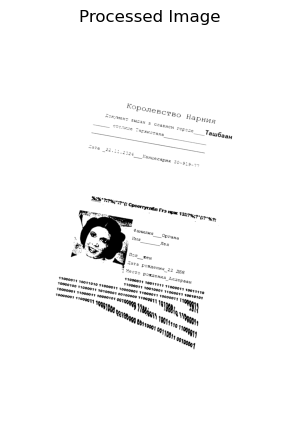

Text from D:/IMage\r2.jpg:
5 X#% 22 Королевство Дзк:ие:  Нарния Еыiз: стаанс? cffEZ3e rcrsze_ -арzуsza:a Ташбаан Датa 22.;:. 7T2 = :з:целяркя 33-9: 9-77 "2 %;"2*(: Срсегryлол Ггэ #рж 13":?%;?" | (:2*%?: Факилия Органа ;мя Лея Пэл хен Дата рсжления 'esт? ДБЯ раяде= ния 1100001 1 #лдераан 11000011 10011010 10011111 1оо0010о 11000011 11000011 11000011 11000011 1о01оо01 1оо0оо01 1ооооо01 10011110 1о1ооо01 11000011 11000011 11000011 оотооооо 1оо0оо01 10010101 10000101 100оо011 11000011 71000011 99100009  'iQ{iJl 1g {la  1000100 = )IlMhn1 QQ{60Q00 5 1360jU11 10011410 - 60110601 11600011 09110011 = 00100601

Processing r3.jpg...


Using CPU. Note: This module is much faster with a GPU.


Detected rotation angle for D:/IMage\r3.jpg: 270
Rotating image by 270 degrees.


In [ ]:
import numpy as np
import cv2
import easyocr
import pytesseract
import re
import matplotlib.pyplot as plt
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def upscale_image(image, scale=2):
    """
    Увеличение разрешения изображения.
    """
    height, width = image.shape[:2]
    return cv2.resize(image, (width * scale, height * scale), interpolation=cv2.INTER_CUBIC)

def get_image_orientation(image_path):
    """
    Определение ориентации изображения с использованием Tesseract OCR.
    """
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = upscale_image(gray, scale=2)  # Увеличение разрешения для улучшения OCR
    
    try:
        osd = pytesseract.image_to_osd(gray)  # Определение ориентации
        rotation_angle = int(re.search('(?<=Rotate: )\d+', osd).group(0))
        print(f"Detected rotation angle for {image_path}: {rotation_angle}")
        return rotation_angle
    except pytesseract.TesseractError as e:
        print(f"Tesseract failed to detect orientation: {e}")
        return 0  # Возвращаем угол 0, если OCR не смог определить ориентацию
    except Exception as e:
        print(f"Unexpected error during orientation detection: {e}")
        return 0  # На случай других ошибок

def correct_image_orientation(image_path):
    """
    Коррекция ориентации изображения на основе данных от Tesseract OCR.
    """
    rotation_angle = get_image_orientation(image_path)
    img = cv2.imread(image_path)
    
    # Обрабатываем только допустимые углы
    if rotation_angle not in [0, 90, 180, 270, 360]:
        print(f"Unexpected rotation angle {rotation_angle}, skipping correction.")
        return img  # Возвращаем оригинальное изображение без изменений
    
    # Поворот изображения
    if rotation_angle != 0:
        print(f"Rotating image by {rotation_angle} degrees.")
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, -rotation_angle, 1.0)  # Поворот против часовой стрелки
        corrected_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    else:
        corrected_img = img
    
    return corrected_img

def preprocess_image(image_path, blur_kernel=(7, 7), threshold_value=127):
    """
    Предобработка изображения: коррекция ориентации, уменьшение шума и бинаризация.
    """
    # Коррекция ориентации
    corrected_img = correct_image_orientation(image_path)

    # Преобразование в оттенки серого
    gray = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2GRAY)

    # Выравнивание гистограммы для улучшения контраста
    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))  
    gray = clahe.apply(gray)

    # Уменьшение шума
    denoised = cv2.GaussianBlur(gray, blur_kernel, 0)

    # Бинаризация
    _, binary = cv2.threshold(denoised, threshold_value, 255, cv2.THRESH_BINARY)

    return corrected_img, binary

def recognize_text(image, engine="easyocr"):
    """
    Распознавание текста с использованием EasyOCR или Tesseract.
    """
    if engine == "easyocr":
        reader = easyocr.Reader(['en', 'ru'], gpu=False)  # Выключите GPU, если возникают ошибки
        results = reader.readtext(image)
        recognized_text = " ".join([res[1] for res in results])
    elif engine == "tesseract":
        recognized_text = pytesseract.image_to_string(image, lang="rus+eng")
    else:
        raise ValueError("Invalid OCR engine. Choose 'easyocr' or 'tesseract'.")
    
    return recognized_text

def process_image(image_path, output_dir):
    """
    Обработка изображения, распознавание текста и вывод результатов.
    """
    # Предобработка изображения
    corrected_img, processed_img = preprocess_image(image_path, blur_kernel=(5, 5), threshold_value=100)

    # Распознавание текста
    text = recognize_text(processed_img)

    # Вывод оригинального и обработанного изображений
    original_image = cv2.imread(image_path)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 1)
    plt.title("Processed Image")
    plt.imshow(processed_img, cmap="gray")
    plt.axis('off')
    plt.show()

    # Сохранение результатов
    output_image_file = os.path.join(output_dir, f"{os.path.basename(image_path)}_processed.png")
    cv2.imwrite(output_image_file, processed_img)


    print(f"Text from {image_path}:\n{text}\n")
    return text

def main():
    """
    Главная функция для обработки всех изображений в указанной папке.
    """
    input_folder = "D:/IMage"  # Папка с тестовыми изображениями
    output_folder = "D:/output_results"  # Папка для сохранения результатов
    os.makedirs(output_folder, exist_ok=True)

    for image_file in os.listdir(input_folder):
        image_path = os.path.join(input_folder, image_file)
        if image_file.lower().endswith(('png', 'jpg', 'jpeg')):
            print(f"Processing {image_file}...")
            process_image(image_path, output_folder)

if __name__ == "__main__":
    main()
